In [ ]:
## Replace this with your name and Section

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [7]:
# Add the boilerplate code for importing the required packages and data
import pandas as pd
import matplotlib.pyplot as plt

titanic_df = pd.read_csv("titanic.csv")

titanic_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,Mr,0


## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [15]:
passengers = len(titanic_df)
male = (titanic_df['Sex'].mean()) * 100
survived = (titanic_df['Survived'].mean()) * 100

print('Numbers of recorded passengers:', passengers)
print('Male percentage:', male)
print('Survival percentage:', survived)

Numbers of recorded passengers: 891
Male percentage: 64.75869809203144
Survival percentage: 38.38383838383838


Your written answer:

 - Numbers of recorded passengers: 891
 - Male percentage: 64.75869809203144
 - Survival percentage: 38.38383838383838

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [17]:
survived_female = titanic_df[titanic_df['Sex'] == 0]['Survived'].mean() * 100 
survived_male = titanic_df[titanic_df['Sex'] == 1]['Survived'].mean() * 100 

print('Female survival percentage:', survived_female)
print('Male survival percentage:', survived_male)

Female survival percentage: 74.20382165605095
Male survival percentage: 18.890814558058924


Your written answer:

 - Female survival percentage: 74.20382165605095
 - Male survival percentage: 18.890814558058924

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [28]:
tickets = titanic_df.groupby('Pclass').agg(
    total_tickets=('PassengerId', 'count'),
    survival_rate=('Survived', 'mean')
)

tickets['percentage_of_total_tickets'] = (tickets['total_tickets'] / passengers) * 100

tickets['survival_rate'] *= 100

tickets

,total_tickets,survival_rate,percentage_of_total_tickets
Pclass,,,
1,216,62.962963,24.242424
2,184,47.282609,20.650954
3,491,24.236253,55.106622


Your written answer:

 - Class 1 
    - % tickets: 24.242424
    - % survivorship: 62.962963
- Class 2 
    - % tickets 20.650954
    - % survivorship: 47.282609
- Class 3
    - % tickets: 55.106622
    - % survivorship: 24.236253


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

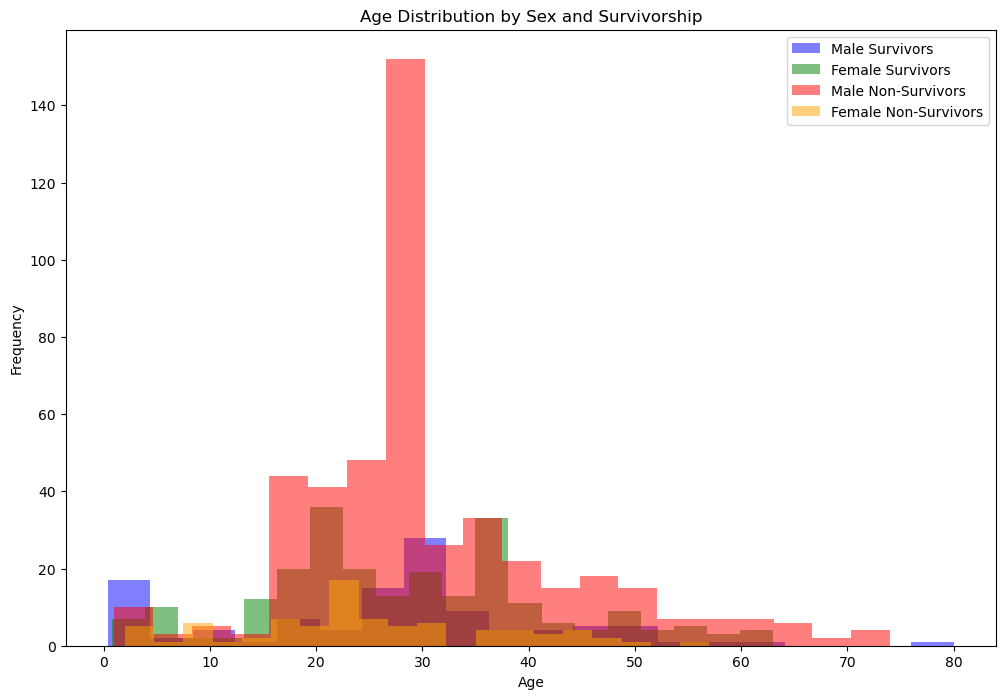

In [33]:
survivors_df = titanic_df[titanic_df['Survived'] == 1][['Age', 'Name', 'Sex']]
non_survivors_df = titanic_df[titanic_df['Survived'] == 0][['Age', 'Name', 'Sex']]

survivors_df.head()
non_survivors_df.head()

plt.figure(figsize = (12, 8))

plt.hist(
    survivors_df[survivors_df['Sex'] == 1]['Age'].dropna(),
    bins = 20,
    alpha = 0.5,
    color = 'blue',
    label = 'Male survivors',
    histtype = 'stepfilled'
)

plt.hist(
    survivors_df[survivors_df['Sex'] == 0]['Age'].dropna(),
    bins = 20,
    alpha = 0.5,
    color = 'green',
    label = 'Female survivors',
    histtype = 'stepfilled'
)

plt.hist(
    non_survivors_df[non_survivors_df['Sex'] == 1]['Age'].dropna(),
    bins = 20,
    alpha = 0.5,
    color = 'red',
    label = 'Male Non-survivors',
    histtype = 'stepfilled'
)

plt.hist(
    non_survivors_df[non_survivors_df['Sex'] == 0]['Age'].dropna(),
    bins = 20,
    alpha = 0.5,
    color = 'orange',
    label = 'Female Non-survivors',
    histtype = 'stepfilled'
)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Sex and Survivorship')
plt.legend()
plt.show()

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

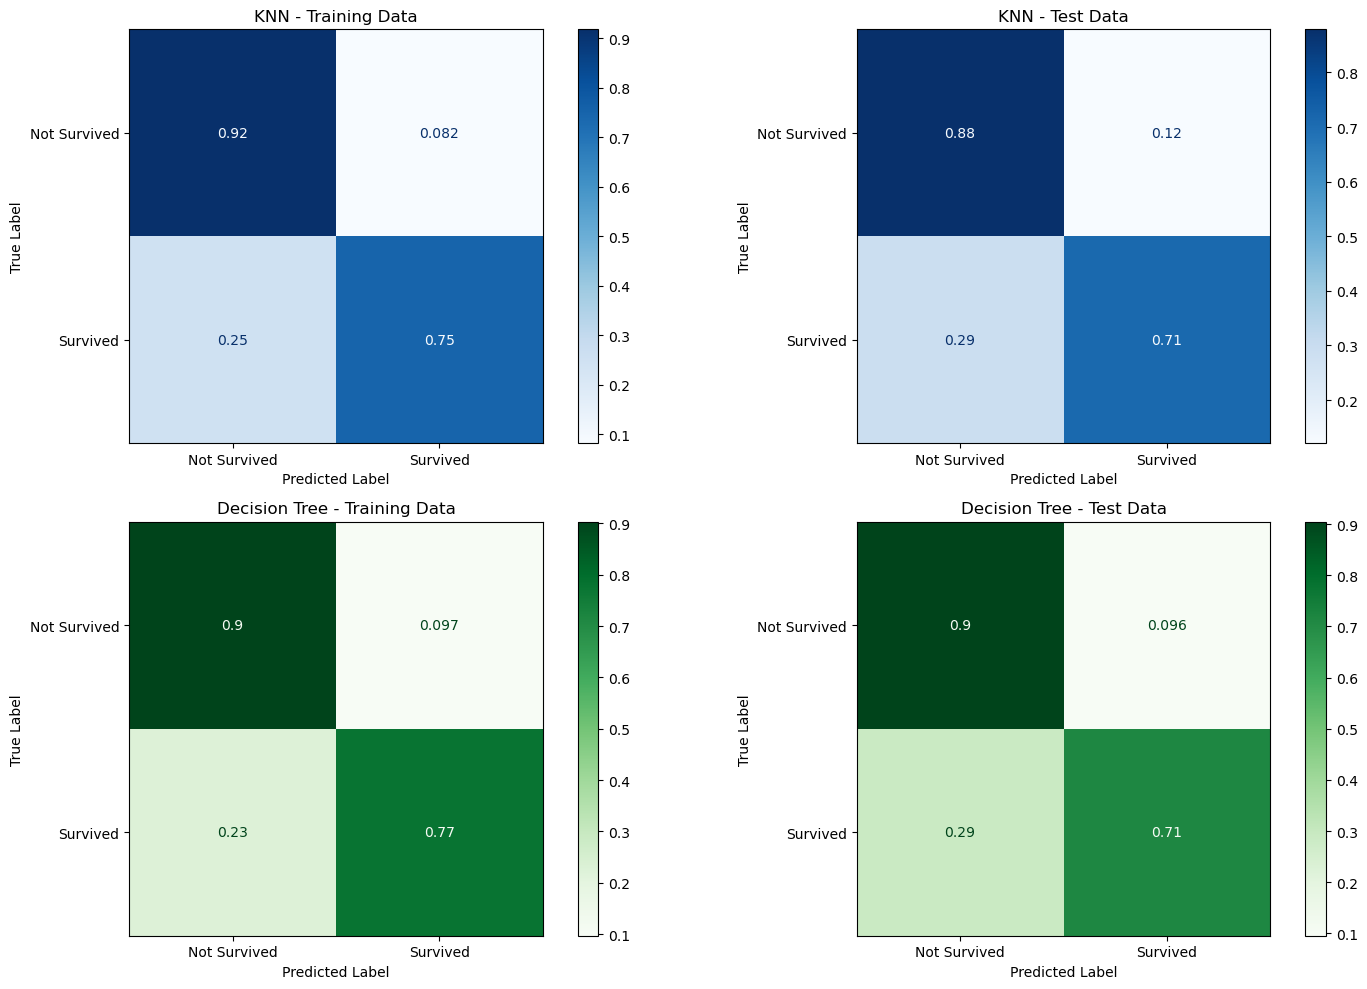

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

features = titanic_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size']]
features = features.fillna(features.mean()) 
label = titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.3, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors = 5)
tree_model = DecisionTreeClassifier(max_depth = 5, random_state = 42)

knn_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

knn_train = knn_model.predict(X_train)
knn_train_test = knn_model.predict(X_test)
tree_train = tree_model.predict(X_train)
tree_train_test = tree_model.predict(X_test)

fig, ax = plt.subplots(2, 2, figsize = (15, 10))

ConfusionMatrixDisplay.from_predictions(
    y_train, knn_train,
    display_labels = ['Not Survived', 'Survived'],
    normalize = 'true',
    cmap = 'Blues',
    ax = ax[0, 0]
)
ax[0, 0].set_title('KNN - Training Data')
ax[0, 0].set_xlabel('Predicted Label')
ax[0, 0].set_ylabel('True Label')

ConfusionMatrixDisplay.from_predictions(
    y_test, knn_train_test,
    display_labels = ['Not Survived', 'Survived'],
    normalize = 'true',
    cmap = 'Blues',
    ax = ax[0, 1]
)
ax[0, 1].set_title('KNN - Test Data')
ax[0, 1].set_xlabel('Predicted Label')
ax[0, 1].set_ylabel('True Label')

ConfusionMatrixDisplay.from_predictions(
    y_train, tree_train,
    display_labels = ['Not Survived', 'Survived'],
    normalize = 'true',
    cmap = 'Greens',
    ax = ax[1, 0]
)
ax[1, 0].set_title('Decision Tree - Training Data')
ax[1, 0].set_xlabel('Predicted Label')
ax[1, 0].set_ylabel('True Label')

ConfusionMatrixDisplay.from_predictions(
    y_test, tree_train_test,
    display_labels = ['Not Survived', 'Survived'],
    normalize = 'true',
    cmap = 'Greens',
    ax = ax[1, 1]
)
ax[1, 1].set_title('Decision Tree - Test Data')
ax[1, 1].set_xlabel('Predicted Label')
ax[1, 1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - For the KNN model, it performs well on both training and test data but does show a slight drop in accuracy on the test set, seen as mild overfitting. Meanwhile, The Decision Tree model generalizes better, as the performance on the test data is very similar to the training data, suggesting less overfitting.


Which models did you fit and which worked better?
 
 - I used KNN and Decision tree model and Decisio Tree worked better as it showed more consistency.